# Importing the dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Customer Attrition/Data/train.csv')

In [ ]:
df.head()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,B60LHTZLLPFU4IULNPUF,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes
1,1RUJ7ONYZHYTWKOKO1SD,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No
2,DZ9EEOQWSN0MYCBUPAM5,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes
3,YZ43L1UQUQACTL1PXXZG,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No
4,6P28152QGF60PDLSCB9M,Female,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6338 non-null   object 
 1   sex                  6338 non-null   object 
 2   Aged                 6338 non-null   object 
 3   Married              6338 non-null   object 
 4   TotalDependents      6338 non-null   object 
 5   ServiceSpan          6338 non-null   int64  
 6   MobileService        6338 non-null   object 
 7   4GService            6338 non-null   object 
 8   CyberProtection      6338 non-null   object 
 9   HardwareSupport      6338 non-null   object 
 10  TechnicalAssistance  6338 non-null   object 
 11  FilmSubscription     6338 non-null   object 
 12  SettlementProcess    6338 non-null   object 
 13  QuarterlyPayment     6338 non-null   float64
 14  GrandPayment         6328 non-null   float64
 15  CustomerAttrition    6338 non-null   o

In [ ]:
df.describe()

,ServiceSpan,QuarterlyPayment,GrandPayment
count,6338.000000,6338.000000,6328.000000
mean,31.946040,64.814490,2290.544207
std,24.559659,30.191091,2265.181098
min,-2.000000,16.504109,16.297961
25%,8.000000,35.645524,401.849530
50%,29.000000,70.534085,1407.589119
75%,55.000000,90.058498,3823.855846
max,73.000000,120.159190,8685.848657


In [ ]:
df['CustomerAttrition'].value_counts()

No     4658
Yes    1680
Name: CustomerAttrition, dtype: int64

From the above output we can clearly see that the given dataset is fairly imbalanced and we need to take it into consideration

# Deal with missing data

From above we can see that GrandPayment has 10 nan values. Let's check

In [ ]:
df[df['GrandPayment'].isna() == True]

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
643,WM9BC6CU0ZI1B7WDPZ6G,Female,No,Yes,Yes,1,Yes,No,No,No,No,Yes,Check,24.055624,NaN,No
1169,41E4MSKS139ATWAHUWS5,Male,No,Yes,Yes,1,Yes,Wifi Broadband,No,Yes,Yes,Yes,Check,73.051308,NaN,No
1186,LZMNTZPKWEM8IAOSPSTQ,Female,No,Yes,Yes,-1,Yes,Satellite Broadband,Yes,Yes,No,No,Check,80.233357,NaN,No
2281,N3OCBW4F5ADT1GNDI1K8,Female,No,Yes,Yes,1,Yes,No,No,No,No,No,Check,20.607275,NaN,No
3611,IS6FHA32W1KEETF478HC,Male,No,Yes,Yes,-1,Yes,Satellite Broadband,No,No,No,No,Check,26.212375,NaN,No
3918,S661RZU0I205HLT4G6DD,Male,No,Yes,Yes,0,Yes,Satellite Broadband,No,No,No,Yes,Check,19.918643,NaN,No
5579,Z5G1GX5IS15OMT9HRYJU,Male,No,Yes,Yes,0,Yes,Wifi Broadband,Yes,Yes,Yes,No,Bank,51.669205,NaN,No
5742,QEQYQ949C4H8J47LT3W4,Female,No,Yes,Yes,-2,Yes,Wifi Broadband,Yes,Yes,Yes,No,Card,56.157994,NaN,No
5796,P7UZJPSJDE0QKU1L3MIP,Male,No,Yes,Yes,1,Yes,Satellite Broadband,No,No,No,Yes,Check,20.075335,NaN,No
6203,SGAKX7STDIYEMP82AMFY,Male,No,No,Yes,1,Yes,Satellite Broadband,No,No,No,Yes,Check,20.687134,NaN,No


All nan rows has customerAttrition as 'No'. So check the data of not nan rows with customerAttrition == 'No'

In [ ]:
df[(df['CustomerAttrition'] == 'No') & (df['GrandPayment'].isna() == False)].describe()

,ServiceSpan,QuarterlyPayment,GrandPayment
count,4648.000000,4648.000000,4648.000000
mean,37.162220,61.426090,2558.720051
std,24.084296,31.197429,2324.333066
min,-1.000000,16.504109,16.297961
25%,15.000000,25.067601,580.949107
50%,37.000000,64.611231,1687.873268
75%,60.000000,88.426109,4269.531817
max,73.000000,120.159190,8673.187693


We can observe that all nan rows have ServiceSpan  between -1 and 1. But service span is always positive but we will deal with it later but first let's check the mean and std of data with customerAttrition == 'No' and service span between -1 and 1

In [ ]:
df[(df['ServiceSpan'] == -1) | (df['ServiceSpan'] <= 1) & (df['CustomerAttrition'] == 'No')].describe()

,ServiceSpan,QuarterlyPayment,GrandPayment
count,330.000000,330.000000,320.000000
mean,-0.106061,47.480739,64.275295
std,0.849258,24.745144,51.747683
min,-2.000000,16.840283,16.297961
25%,-1.000000,21.179498,24.265192
50%,0.000000,46.431003,49.792873
75%,1.000000,70.225061,76.837161
max,1.000000,108.365820,318.524256


We can fill the mean (64.275) of Grand Payment in nan rows

In [ ]:
mean_to_fill = df[(df['ServiceSpan'] == -1) | (df['ServiceSpan'] <= 1) & (df['CustomerAttrition'] == 'No')]['GrandPayment'].mean()

In [ ]:
df.fillna(mean_to_fill, inplace=True)

In [ ]:
df[df['GrandPayment'].isna() == True].count()

ID                     0
sex                    0
Aged                   0
Married                0
TotalDependents        0
ServiceSpan            0
MobileService          0
4GService              0
CyberProtection        0
HardwareSupport        0
TechnicalAssistance    0
FilmSubscription       0
SettlementProcess      0
QuarterlyPayment       0
GrandPayment           0
CustomerAttrition      0
dtype: int64

# Work on non positive service span data

In [ ]:
df[df['ServiceSpan'] <= 0]

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
7,LTKNFUXFICQI8MSX5RWI,Female,Yes,No,Yes,0,Yes,Wifi Broadband,No,No,No,No,Electronic,70.062808,70.934345,Yes
26,KR80BM41H9NY62Q9GQRH,Female,No,Yes,Yes,0,Yes,Satellite Broadband,No,No,No,Yes,Bank,17.970238,20.984040,No
40,T2O6KQFJUFI64RN7UR29,Female,No,No,Yes,0,No,Wifi Broadband,No,No,No,No,Check,21.985193,19.350136,No
51,KNJ68L07G7UPL0O7GJ8T,Male,Yes,Yes,Yes,-1,Yes,No,No,No,Yes,Yes,Card,49.402192,49.384029,Yes
53,KO1YG3DMANI47G3AKHS2,Female,No,No,No,-1,Yes,Satellite Broadband,No,No,No,No,Check,25.009332,24.269131,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6276,ERNJ3XB4WF91S2FBIL7Z,Female,No,No,No,0,Yes,Wifi Broadband,No,No,No,No,Bank,20.660044,19.163217,No
6307,H7PCRWR3U72BCFY6X8ED,Male,Yes,No,No,0,Yes,Satellite Broadband,No,Yes,No,Yes,Electronic,44.385808,42.768224,Yes
6322,WW0GKJN97PY7F7XTKZN7,Male,No,No,No,0,Yes,Satellite Broadband,No,No,No,No,Electronic,93.604209,91.084541,Yes
6323,LBP5H9IONQ0C6PQYOSOB,Female,Yes,Yes,No,0,Yes,Wifi Broadband,No,No,No,No,Electronic,91.135867,90.630675,Yes


In [ ]:
df[df['ServiceSpan'] <= 0].describe()

,ServiceSpan,QuarterlyPayment,GrandPayment
count,343.000000,343.000000,343.000000
mean,-0.399417,52.320083,60.483761
std,0.496420,25.375118,37.874352
min,-2.000000,17.384627,16.297961
25%,-1.000000,23.944489,26.014304
50%,0.000000,50.487199,53.069005
75%,0.000000,74.588065,77.348433
max,0.000000,102.473171,197.210438


In [ ]:
df[df['ServiceSpan'] == 1].describe()

,ServiceSpan,QuarterlyPayment,GrandPayment
count,230.0,230.000000,230.000000
mean,1.0,53.011019,95.913766
std,0.0,26.121598,73.953055
min,1.0,16.840283,17.807404
25%,1.0,25.002525,44.767472
50%,1.0,50.694245,71.988535
75%,1.0,74.374763,137.018890
max,1.0,108.365820,331.783260


In [ ]:
df[df['ServiceSpan'] <= 0]['CustomerAttrition'].value_counts()

Yes    203
No     140
Name: CustomerAttrition, dtype: int64

In [ ]:
df[df['ServiceSpan'] == 1]['CustomerAttrition'].value_counts()

Yes    128
No     102
Name: CustomerAttrition, dtype: int64

Based on above observations we can conclude that we can replace non zero values in service span with 1 as it resembles them closely when compared to other values of service span

In [ ]:
df['ServiceSpan'].replace([-2, -1, 0], 1, inplace=True)

In [ ]:
df[df['ServiceSpan'] <= 0].count()

ID                     0
sex                    0
Aged                   0
Married                0
TotalDependents        0
ServiceSpan            0
MobileService          0
4GService              0
CyberProtection        0
HardwareSupport        0
TechnicalAssistance    0
FilmSubscription       0
SettlementProcess      0
QuarterlyPayment       0
GrandPayment           0
CustomerAttrition      0
dtype: int64

# Visualisation

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

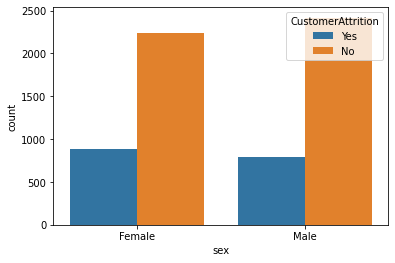

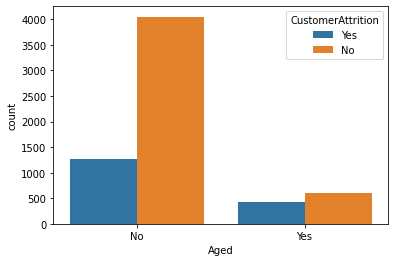

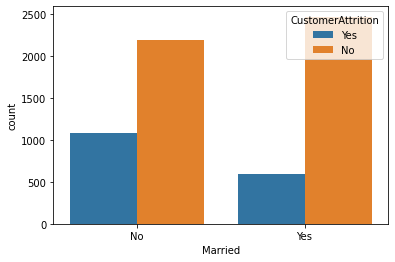

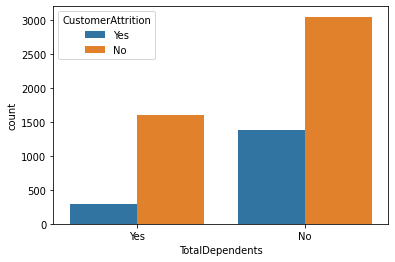

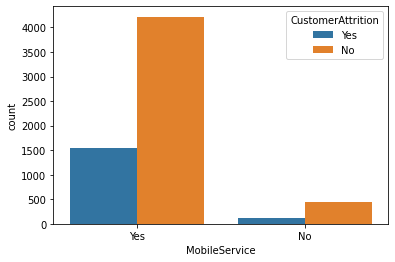

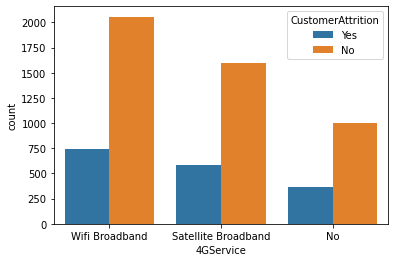

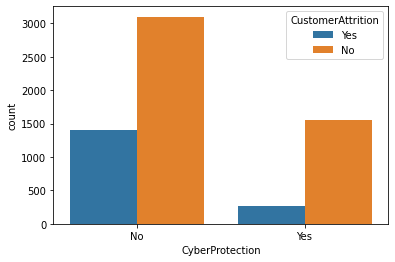

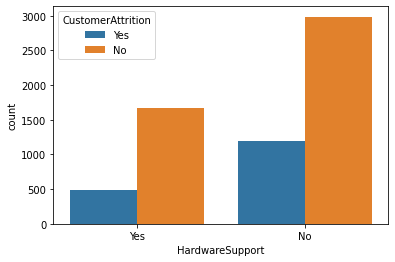

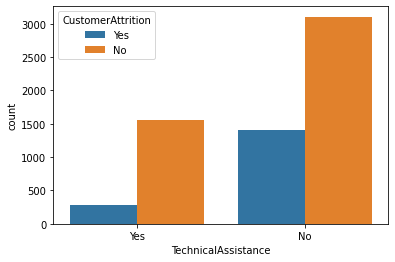

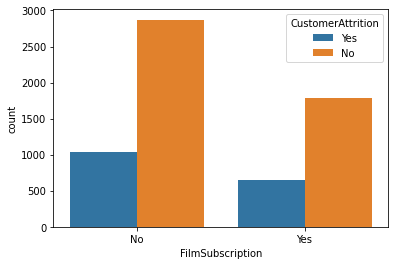

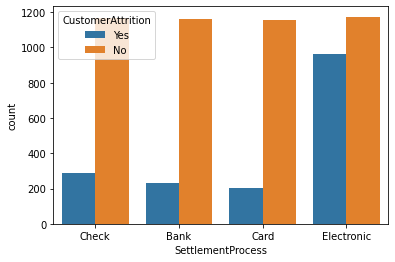

In [ ]:
for i, predictor in enumerate(df.drop(columns=["ID", 'CustomerAttrition', 'ServiceSpan', 'GrandPayment', 'QuarterlyPayment'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='CustomerAttrition')

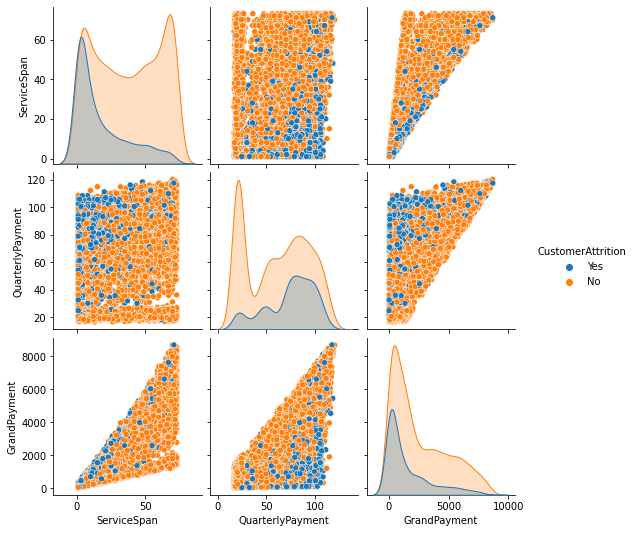

In [ ]:
sns.pairplot(df, hue='CustomerAttrition')

Total Charges increase as Monthly Charges increase - as expected.

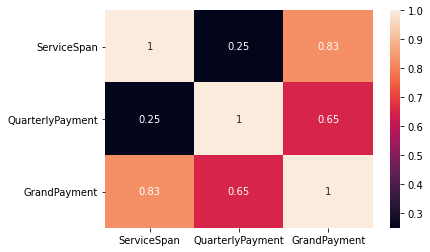

In [ ]:
num_cols = ['ServiceSpan', 'QuarterlyPayment', 'GrandPayment']
sns.heatmap(df[num_cols].corr(), annot=True)

# Data Preprocessing

In [ ]:
X = df.drop(['CustomerAttrition', 'ID'], axis=1)
y = df['CustomerAttrition']

In [ ]:
X.columns

Index(['sex', 'Aged', 'Married', 'TotalDependents', 'ServiceSpan',
       'MobileService', '4GService', 'CyberProtection', 'HardwareSupport',
       'TechnicalAssistance', 'FilmSubscription', 'SettlementProcess',
       'QuarterlyPayment', 'GrandPayment'],
      dtype='object')

In [ ]:
for feature in X:
  print(f'{feature}: {X[feature].unique()}')

sex: ['Female' 'Male']
Aged: ['No' 'Yes']
Married: ['No' 'Yes']
TotalDependents: ['Yes' 'No']
ServiceSpan: [48 45 59 14 25 27 53  1 46 67 24 61 54  9 30 18  5 64  3 41 40 31 21 15
  6 69 72 33 71  2 36  8 37 34 28 60 22 68 11 39 58 10 50  4 44 49 38 55
 51 16 65 13 26 19 57 70 73 42 35 62 23 56 47 63 32 29  7 20 43 12 52 17
 66]
MobileService: ['Yes' 'No']
4GService: ['Wifi Broadband' 'Satellite Broadband' 'No']
CyberProtection: ['No' 'Yes']
HardwareSupport: ['Yes' 'No']
TechnicalAssistance: ['Yes' 'No']
FilmSubscription: ['No' 'Yes']
SettlementProcess: ['Check' 'Bank' 'Card' 'Electronic']
QuarterlyPayment: [ 96.25980197  18.87647016 106.0160571  ...  35.94171339  94.76298428
  94.3373432 ]
GrandPayment: [4628.129119   922.0859985 6205.891129  ...  552.1813408 4563.812326
 5756.542013 ]


In [ ]:
X['sex'].replace('Male', 1, inplace=True)
X['sex'].replace('Female', 0, inplace=True)

X.replace('Yes', 1, inplace=True)
X.replace('No', 0, inplace=True)


In [ ]:
X['4G_Wifi'] = X['4GService']
X['4G_Wifi'].replace('Wifi Broadband', 1, inplace=True)
X['4G_Wifi'].replace(['Satellite Broadband', 'No'], 0, inplace=True)

X['4G_Satellite'] = X['4GService']
X['4G_Satellite'].replace('Satellite Broadband', 1, inplace=True)
X['4G_Satellite'].replace(['Wifi Broadband', 'No'], 0, inplace=True)

X.drop('4GService', axis=1, inplace=True)

In [ ]:
X['Payment_Check'] = X['SettlementProcess']
X['Payment_Check'].replace('Check', 1, inplace=True)
X['Payment_Check'].replace(['Bank', 'Card', 'Electronic'], 0, inplace=True)

X['Payment_Bank'] = X['SettlementProcess']
X['Payment_Bank'].replace('Bank', 1, inplace=True)
X['Payment_Bank'].replace(['Check', 'Card', 'Electronic'], 0, inplace=True)

X['Payment_Electronic'] = X['SettlementProcess']
X['Payment_Electronic'].replace('Electronic', 1, inplace=True)
X['Payment_Electronic'].replace(['Check', 'Bank', 'Card'], 0, inplace=True)

X.drop('SettlementProcess', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

features_to_scale = ['ServiceSpan', 'QuarterlyPayment', 'GrandPayment']
X[features_to_scale] = scaler.fit_transform(X[features_to_scale])

X = X.round(decimals=2)

In [ ]:
for feature in X:
  print(f'{feature}: {X[feature].unique()}')

sex: [0 1]
Aged: [0 1]
Married: [0 1]
TotalDependents: [1 0]
ServiceSpan: [0.65 0.61 0.81 0.18 0.33 0.36 0.72 0.   0.62 0.92 0.32 0.83 0.74 0.11
 0.4  0.24 0.06 0.88 0.03 0.56 0.54 0.42 0.28 0.19 0.07 0.94 0.99 0.44
 0.97 0.01 0.49 0.1  0.5  0.46 0.37 0.82 0.29 0.93 0.14 0.53 0.79 0.12
 0.68 0.04 0.6  0.67 0.51 0.75 0.69 0.21 0.89 0.17 0.35 0.25 0.78 0.96
 1.   0.57 0.47 0.85 0.31 0.76 0.64 0.86 0.43 0.39 0.08 0.26 0.58 0.15
 0.71 0.22 0.9 ]
MobileService: [1 0]
CyberProtection: [0 1]
HardwareSupport: [1 0]
TechnicalAssistance: [1 0]
FilmSubscription: [0 1]
QuarterlyPayment: [0.77 0.02 0.86 0.61 0.34 0.01 0.52 0.93 0.7  0.09 0.41 0.37 0.24 0.71
 0.3  0.46 0.85 0.07 0.63 0.03 0.36 0.72 0.42 0.83 0.78 0.08 0.33 0.6
 0.27 0.8  0.97 0.62 0.05 0.59 0.91 0.15 0.2  0.32 0.53 0.51 0.82 0.67
 0.31 0.66 0.84 0.06 0.4  0.76 0.89 0.56 0.68 0.65 0.81 0.87 0.23 0.26
 0.13 0.48 0.54 0.04 0.28 0.17 0.9  0.49 0.5  0.73 0.75 0.79 0.57 0.35
 0.55 0.74 0.58 0.69 0.18 0.47 0.64 0.25 0.38 0.45 0.22 0.21 0.4

In [ ]:
X.dtypes

sex                      int64
Aged                     int64
Married                  int64
TotalDependents          int64
ServiceSpan            float64
MobileService            int64
CyberProtection          int64
HardwareSupport          int64
TechnicalAssistance      int64
FilmSubscription         int64
QuarterlyPayment       float64
GrandPayment           float64
4G_Wifi                  int64
4G_Satellite             int64
Payment_Check            int64
Payment_Bank             int64
Payment_Electronic       int64
dtype: object

In [78]:
y.replace('Yes', 1, inplace=True)
y.replace('No', 0, inplace=True)

In [79]:
cleaned_data =  X
cleaned_data['CustomerAttrition'] = y
cleaned_data.head()

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,QuarterlyPayment,GrandPayment,4G_Wifi,4G_Satellite,Payment_Check,Payment_Bank,Payment_Electronic,CustomerAttrition
0,0,0,0,1,0.65,1,0,1,1,0,0.77,0.53,1,0,1,0,0,1
1,1,0,1,0,0.61,1,0,0,0,1,0.02,0.10,1,0,0,1,0,0
2,1,1,1,0,0.81,1,1,0,1,0,0.86,0.71,1,0,0,0,0,1
3,1,0,0,0,0.18,1,0,0,0,0,0.61,0.14,1,0,1,0,0,0
4,0,0,1,1,0.33,1,0,1,0,1,0.34,0.15,1,0,1,0,0,0


In [80]:
cleaned_data.to_csv('/content/drive/MyDrive/Customer Attrition/Data/cleaned.csv', index=False)